In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
data=pd.read_csv(filepath_or_buffer="final.csv",delimiter=";",index_col=False).round(2)

In [3]:
data.head()

,gameid,tournament,gametype,teamA,teamB,resultA,resultB,addinfo,teamA_age,teamB_age,teamA_def_val,teamB_def_val,teamA_off_val,teamB_off_val,teamA_frag,teamB_frag
0,2289743,AC13,Finale,Nigeria,Burkina Faso,1,0,NaN,23.95,26.45,2685714.29,579166.67,4668750.00,1665000.00,19,19
1,2289742,AC13,Spiel um Platz Drei,Mali,Ghana,3,1,NaN,25.38,24.14,1261538.46,1245833.33,2037500.00,4527777.78,20,19
2,2289691,AC13,Halbfinale,Mali,Nigeria,1,4,NaN,25.57,24.00,937500.00,2671428.57,2477777.78,5483333.33,20,20
3,2289692,AC13,Halbfinale,Burkina Faso,Ghana,4,3,n.E.,26.41,24.39,579166.67,1313333.33,1665000.00,4781250.00,19,20
4,2289022,AC13,Viertelfinale,Elfenbeinküste,Nigeria,1,2,NaN,27.83,23.95,3219230.77,2830769.23,9765000.00,5483333.33,19,19


Mean of Nb 5.108108108108109 Variance of Nb 13.805697589481376


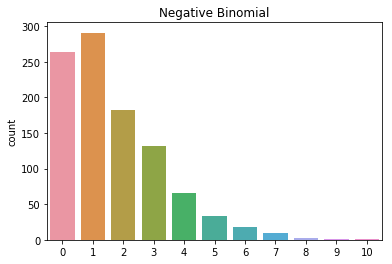

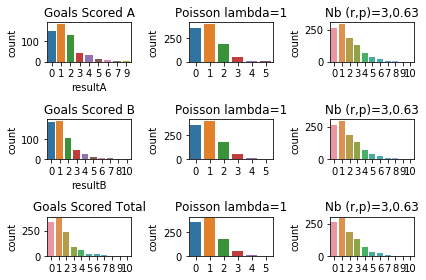

In [4]:
goals = np.concatenate([data.resultA, data.resultB], axis=0)
lam1=1
lam2=2
lambda1 = np.random.poisson(lam1, 1000)
lambda2 = np.random.poisson(lam2, 1000)

nb_r = 3
nb_p = 0.63
nb_mean = nb_r*nb_p/(1-nb_p)
nb_var = nb_mean/(1-nb_p)
print("Mean of Nb",nb_mean,"Variance of Nb",nb_var)
nb=np.random.negative_binomial(nb_r, nb_p,1000)

plt.figure()
sns.countplot(nb)
plt.title("Negative Binomial")
plt.show()

plt.figure()

plt.subplot(331)
plt.title("Goals Scored A")
sns.countplot(data.resultA)

plt.subplot(334)
plt.title("Goals Scored B")
sns.countplot(data.resultB)

plt.subplot(337)
plt.title("Goals Scored Total")
sns.countplot(goals)

plt.subplot(332)
plt.title("Poisson lambda={lam}".format(lam=lam1))
sns.countplot(lambda1)

plt.subplot(335)
plt.title("Poisson lambda={lam}".format(lam=lam1))
sns.countplot(lambda1)

plt.subplot(338)
plt.title("Poisson lambda={lam}".format(lam=lam1))
sns.countplot(lambda1)

plt.subplot(333)
plt.title("Nb (r,p)={r},{p}".format(r=nb_r, p=nb_p))
sns.countplot(nb)

plt.subplot(336)
plt.title("Nb (r,p)={r},{p}".format(r=nb_r, p=nb_p))
sns.countplot(nb)

plt.subplot(339)
plt.title("Nb (r,p)={r},{p}".format(r=nb_r, p=nb_p))
sns.countplot(nb)

plt.tight_layout()


We can see from these pictures that a negative binomial distribution describes the number of goals better than a poisson distribution. The poisson distribution suffers from overdispersion, because the variance of the dataset is higher than its mean.

In [5]:
# Encode round
rounds = {
    "Finale": 1,
    "Spiel um Platz Drei": 2,
    "Halbfinale": 3,
    "Viertelfinale": 4,
    "Achtelfinale": 5,
    "Gruppenphase": 6
}
def map_to_round(x):
    if x.startswith("Gruppe"):
        return rounds["Gruppenphase"]
    else:
        return rounds[x]
data["gametype"]=data["gametype"].apply(map_to_round)

Correlations for resultA:
 [-0.22438974 -0.01330955  0.0688359   0.20312232 -0.16689948  0.18097588
 -0.1866926   0.03639338 -0.08187602  1.        ]
Correlations for resultB:
 [-0.21410116 -0.05751959 -0.00530126 -0.12984285  0.19026676 -0.0907476
  0.1674267  -0.022517   -0.0010454   1.        ]


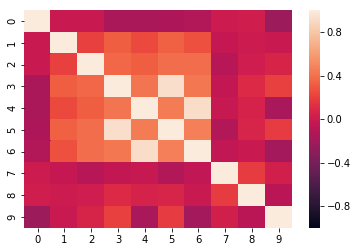

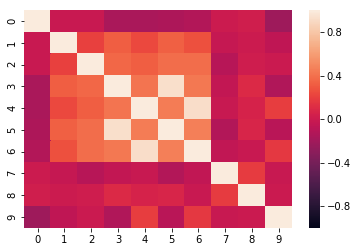

,gametype,teamA_age,teamB_age,teamA_off_val,teamB_off_val,teamA_def_val,teamB_def_val,teamA_frag,teamB_frag,resultA
0,1,23.95,26.45,4668750.00,1665000.00,2685714.29,579166.67,19,19,1
1,2,25.38,24.14,2037500.00,4527777.78,1261538.46,1245833.33,20,19,3
2,3,25.57,24.00,2477777.78,5483333.33,937500.00,2671428.57,20,20,1
3,3,26.41,24.39,1665000.00,4781250.00,579166.67,1313333.33,19,20,4
4,4,27.83,23.95,9765000.00,5483333.33,3219230.77,2830769.23,19,19,1


In [9]:
# correlation heatmap
# count variable vs continuous variable
# spearman correlation

# viewpoint team A
encoded_dataA = data[["gametype","teamA_age","teamB_age","teamA_off_val","teamB_off_val","teamA_def_val","teamB_def_val","teamA_frag","teamB_frag","resultA"]]
corrA = sp.stats.spearmanr(encoded_dataA)[0]
print("Correlations for resultA:\n",corrA[:,-1])

# viewpoint team B
encoded_dataB = data[["gametype","teamA_age","teamB_age","teamA_off_val","teamB_off_val","teamA_def_val","teamB_def_val","teamA_frag","teamB_frag","resultB"]]
corrB = sp.stats.spearmanr(encoded_dataB)[0]
print("Correlations for resultB:\n", corrB[:,-1])

plt.figure()
sns.heatmap(data=corrA,vmin=-1,vmax=1)
plt.figure()
sns.heatmap(data=corrB,vmin=-1,vmax=1)
plt.show()
encoded_dataA.head()

What we can see from this correlation heatmap is that a team's offence market value is closely correlated to a team's defence market value. Perhaps it is already enough to consider the whole team's market value to remove redundancy. Other than that, the heatmap implies the followung relationships:
* The further the tournament progresses, the less goals are scored
* There's no clear relationship between the number of goals scored and both team's ages
* The larger the offence market value of a team is, the more goals are scored (same for defence)
* The smaller the offence market value of the opponent team is, the more goals are scored (same for defence)
* There's no clear relationship between the number of goals scored and the fragmentation of both teams

It looks like out of all the features we have gathered, only two might be useful. This could lead to high bias models since we have so few features.
